## Linear Regression - New York Weather
Since I already did a lot of linear regression using GJ weather, I am going to do it for New York weather here. 

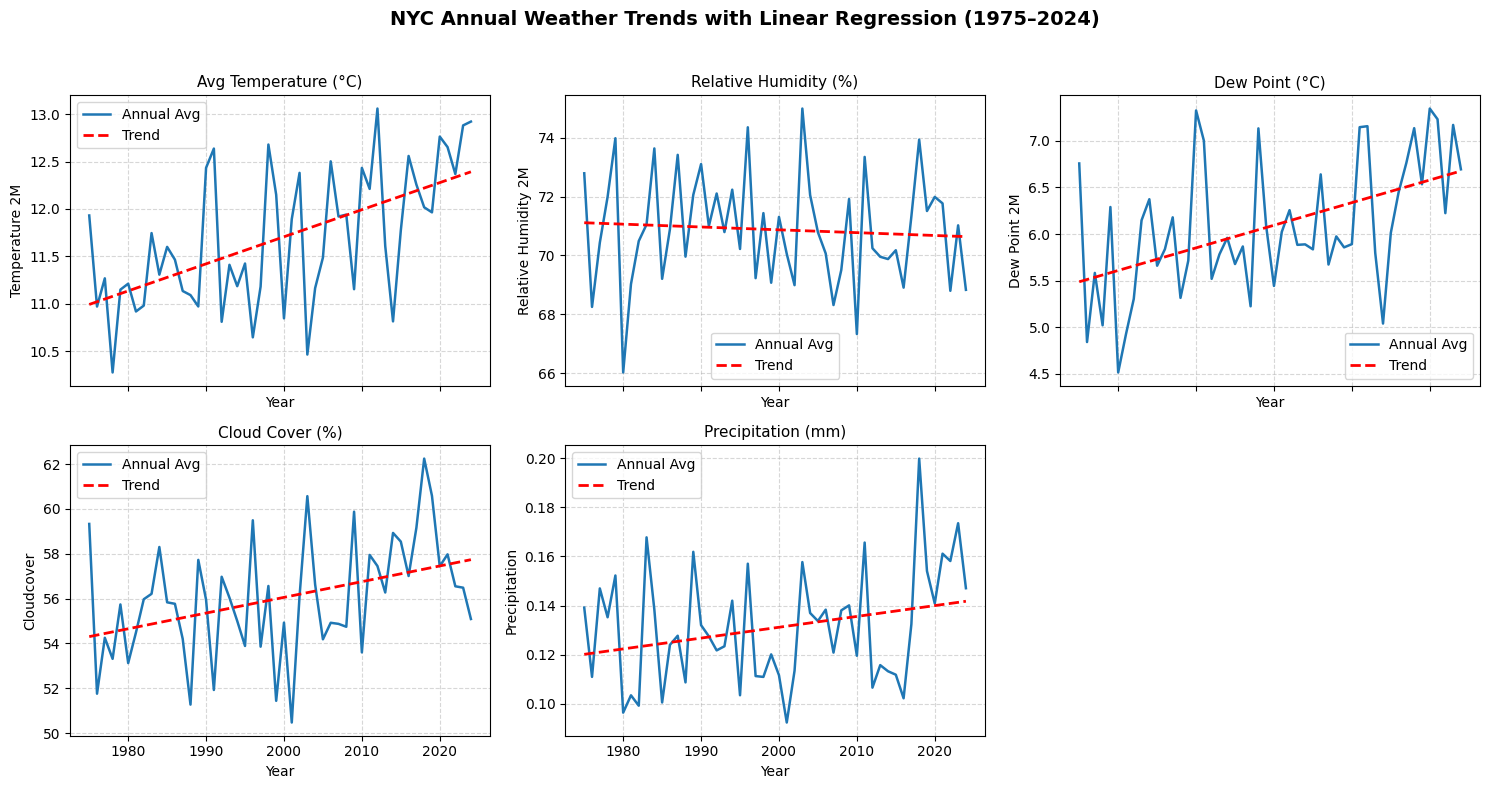


📊 Linear Regression Slopes (trend per year):
Temperature 2M           : 0.0285 per year
Relative Humidity 2M     : -0.0096 per year
Dew Point 2M             : 0.0243 per year
Cloudcover               : 0.0701 per year
Precipitation            : 0.0004 per year


In [4]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Get 50 years of NYC weather data ---
latitude = 40.7128
longitude = -74.0060
start_date = "1975-01-01"
end_date = "2024-12-31"

url = (
    "https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    "&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,cloudcover,precipitation"
    "&timezone=America%2FNew_York"
)

response = requests.get(url)
response.raise_for_status()
data = response.json()

df = pd.DataFrame(data["hourly"])
df["time"] = pd.to_datetime(df["time"])
df["date"] = df["time"].dt.date

# --- 2. Daily means → annual means ---
daily = df.groupby("date", as_index=False)[[
    "temperature_2m",
    "relative_humidity_2m",
    "dew_point_2m",
    "cloudcover",
    "precipitation"
]].mean()

daily["year"] = pd.to_datetime(daily["date"]).dt.year
numeric_cols = ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "cloudcover", "precipitation"]
annual = daily.groupby("year")[numeric_cols].mean()

# --- 3. Plot grid with regression lines ---
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
axes = axes.flatten()
titles = {
    "temperature_2m": "Avg Temperature (°C)",
    "relative_humidity_2m": "Relative Humidity (%)",
    "dew_point_2m": "Dew Point (°C)",
    "cloudcover": "Cloud Cover (%)",
    "precipitation": "Precipitation (mm)",
}

years = annual.index.values.astype(float)

for i, var in enumerate(numeric_cols):
    ax = axes[i]
    y = annual[var].values

    # Plot data
    ax.plot(years, y, color="tab:blue", linewidth=1.8, label="Annual Avg")

    # --- Linear regression ---
    slope, intercept = np.polyfit(years, y, 1)
    trend = slope * years + intercept
    ax.plot(years, trend, color="red", linestyle="--", linewidth=2, label="Trend")

    # --- Labels & titles ---
    ax.set_title(titles[var], fontsize=11)
    ax.set_xlabel("Year")
    ax.set_ylabel(var.replace("_", " ").title())
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend()

# Hide the unused subplot
fig.delaxes(axes[-1])

fig.suptitle("NYC Annual Weather Trends with Linear Regression (1975–2024)", fontsize=14, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 4. Show slopes for interpretation ---
print("\n📊 Linear Regression Slopes (trend per year):")
for var in numeric_cols:
    slope, _ = np.polyfit(years, annual[var].values, 1)
    print(f"{var.replace('_', ' ').title():25s}: {slope:.4f} per year")


## Linear Regression - One Month Across Years

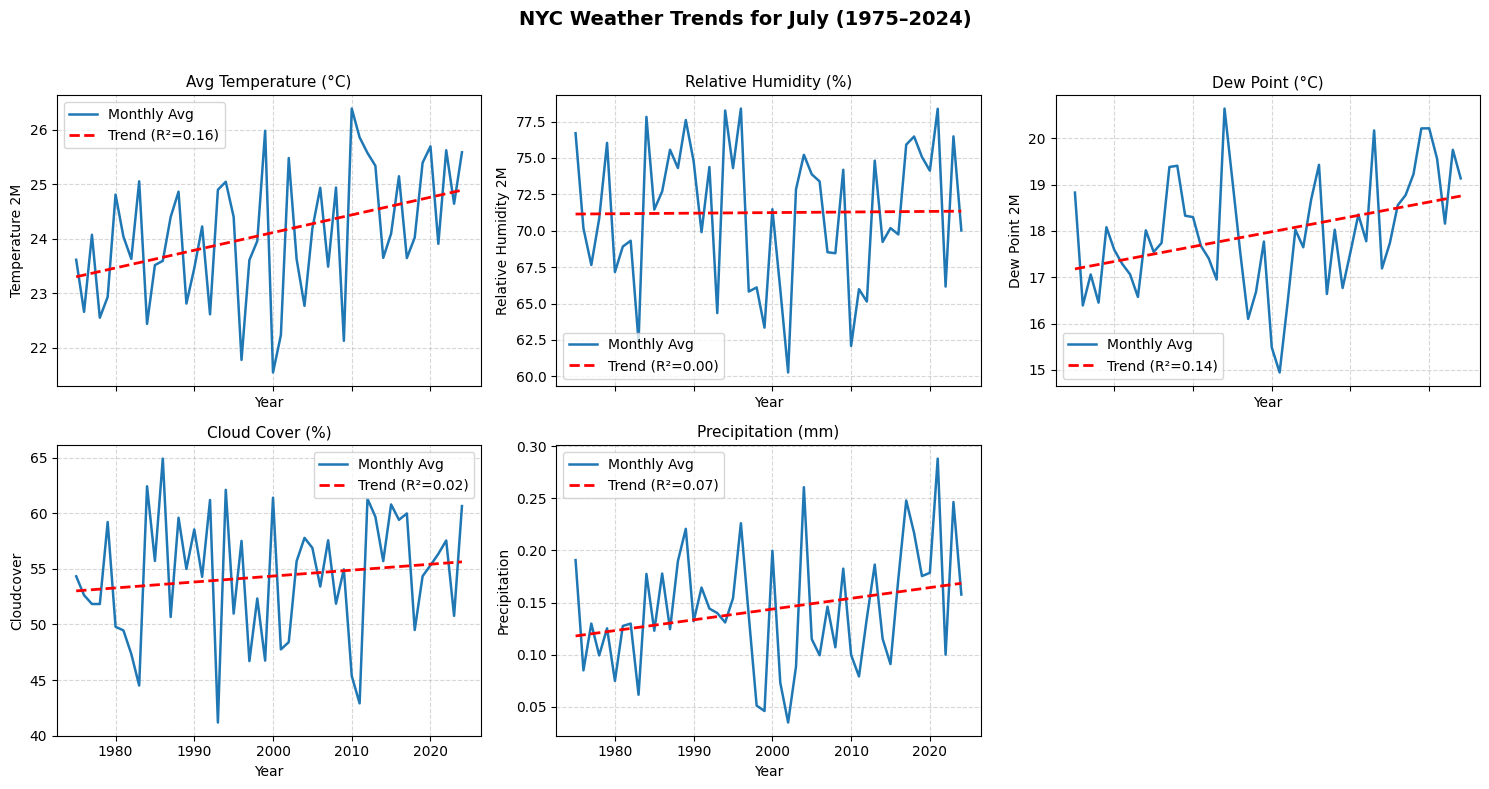


📈 Linear Regression Slopes for July:
Temperature 2M           : 0.0324 per year
Relative Humidity 2M     : 0.0040 per year
Dew Point 2M             : 0.0321 per year
Cloudcover               : 0.0533 per year
Precipitation            : 0.0010 per year


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Choose the month you want (1 = Jan, 2 = Feb, ..., 12 = Dec) ---
target_month = 7   # example: July

# --- Filter daily data for that month across all years ---
monthly = daily[pd.to_datetime(daily["date"]).dt.month == target_month].copy()

# --- Average each variable by year for that month ---
monthly_avg = monthly.groupby("year")[[
    "temperature_2m",
    "relative_humidity_2m",
    "dew_point_2m",
    "cloudcover",
    "precipitation"
]].mean()

years = monthly_avg.index.values.astype(float)

# --- Create a 2×3 grid of subplots ---
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
axes = axes.flatten()

titles = {
    "temperature_2m": "Avg Temperature (°C)",
    "relative_humidity_2m": "Relative Humidity (%)",
    "dew_point_2m": "Dew Point (°C)",
    "cloudcover": "Cloud Cover (%)",
    "precipitation": "Precipitation (mm)"
}

# --- Loop through each weather variable ---
for i, var in enumerate(monthly_avg.columns):
    y = monthly_avg[var].values
    ax = axes[i]

    # Plot yearly values
    ax.plot(years, y, color="tab:blue", linewidth=1.8, label="Monthly Avg")

    # Linear regression fit
    slope, intercept = np.polyfit(years, y, 1)
    trend = slope * years + intercept

    # Compute R²
    ss_res = np.sum((y - trend) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    # Plot regression line
    ax.plot(years, trend, color="red", linestyle="--", linewidth=2,
            label=f"Trend (R²={r2:.2f})")

    # Titles and labels
    ax.set_title(titles[var], fontsize=11)
    ax.set_xlabel("Year")
    ax.set_ylabel(var.replace("_", " ").title())
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend()

# Hide any empty subplot (6th box)
fig.delaxes(axes[-1])

# Figure title
month_name = pd.to_datetime(f"2024-{target_month}-01").strftime("%B")
fig.suptitle(f"NYC Weather Trends for {month_name} (1975–2024)", fontsize=14, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Optional: show slopes for each variable ---
print(f"\n📈 Linear Regression Slopes for {month_name}:")
for var in monthly_avg.columns:
    slope, _ = np.polyfit(years, monthly_avg[var].values, 1)
    print(f"{var.replace('_', ' ').title():25s}: {slope:.4f} per year")


## Findings: 
We do find some patterns when looking at just the month of July in our data. Temperature does go up a significant amount (near 2 degrees). The leading reason is climate change. When looking at the Grand Junction weather we also saw temperatures go up on average. Relative Humidity, cloud coverage, precipitation remain fairly steady. It is easy to be fooled by how the graphs seem to show large variance from year to year. However, the windows on these graphs remain pretty tight. For example, the window on cloud coverage is only between 40 and 65. It only seems natural for months to vary by that much. One interesting thing that we see in both our month and year comparison is that the dew point does go up. This is also consistent with the fact that mean temperatures are going up as well. 

## Linear Regression - July 2024 Data

        date  temp_max  temp_min  temp_mean  humidity  dew_point  cloudcover  \
0 2024-03-01       5.8      -4.5        0.7        58       -6.9          34   
1 2024-03-02      10.0       1.7        6.5        92        5.3         100   
2 2024-03-03      18.6       5.8       11.5        80        7.6          20   
3 2024-03-04      14.2       3.6        8.1        87        6.0          53   
4 2024-03-05       8.3       3.8        6.4        96        5.8          99   

   precipitation  
0            0.0  
1           28.1  
2            0.0  
3            0.0  
4           20.3  


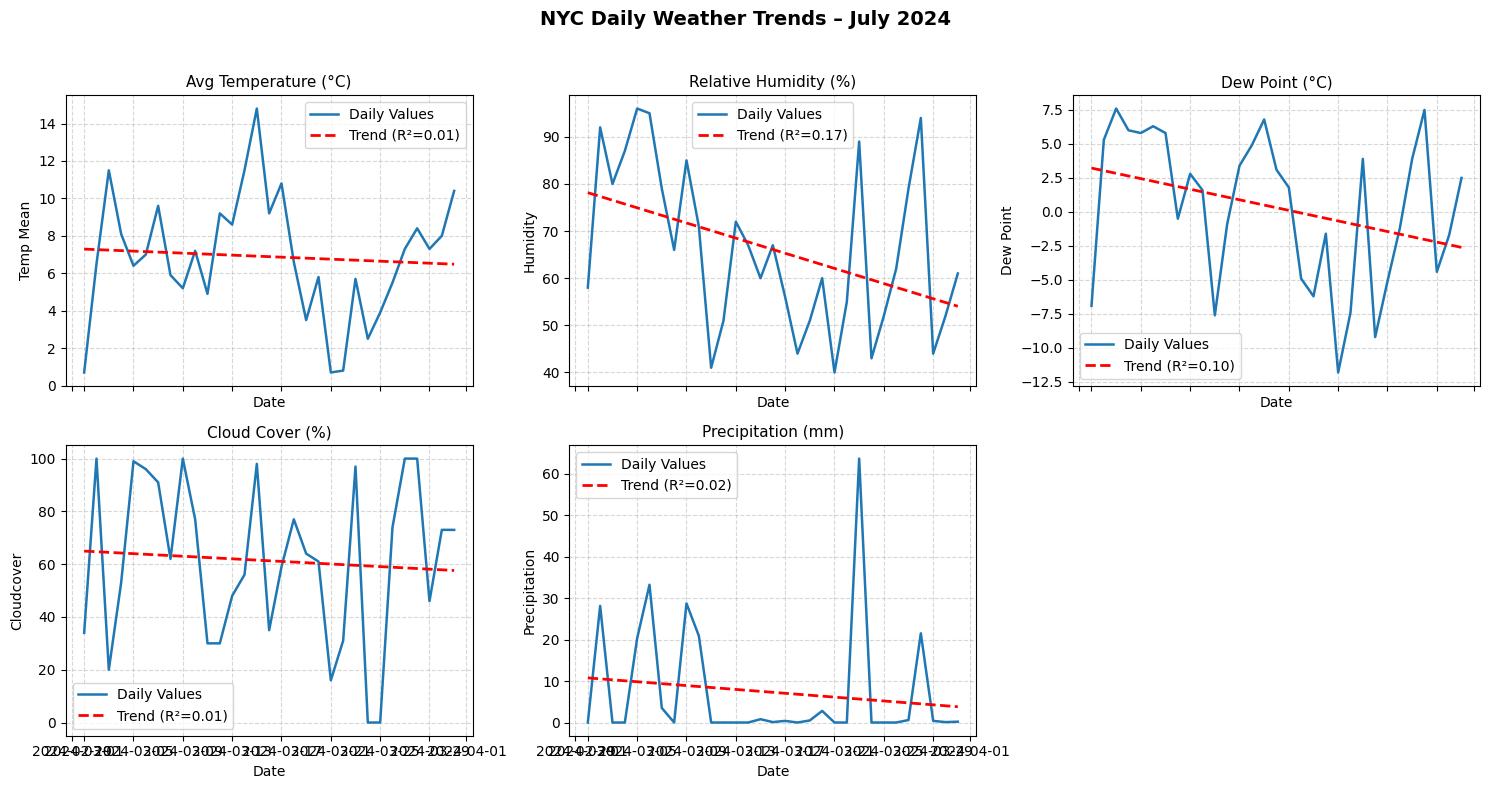


📈 Linear Regression Slopes for July 2024 (per day):
Temp Mean           : -0.0269 per day
Humidity            : -0.8036 per day
Dew Point           : -0.1944 per day
Cloudcover          : -0.2448 per day
Precipitation       : -0.2318 per day


In [14]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Set up parameters for July 2024 in New York City ---
latitude = 40.7128
longitude = -74.0060
start_date = "2024-03-01"
end_date   = "2024-03-31"

# --- 2. Fetch daily reanalysis data ---
url = (
    "https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    "&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,"
    "precipitation_sum,cloudcover_mean,relative_humidity_2m_mean,dew_point_2m_mean"
    "&timezone=America%2FNew_York"
)

response = requests.get(url)
response.raise_for_status()
data = response.json()

# --- 3. Convert to DataFrame ---
daily_2024 = pd.DataFrame({
    "date": pd.to_datetime(data["daily"]["time"]),
    "temp_max": data["daily"]["temperature_2m_max"],
    "temp_min": data["daily"]["temperature_2m_min"],
    "temp_mean": data["daily"]["temperature_2m_mean"],
    "humidity": data["daily"]["relative_humidity_2m_mean"],
    "dew_point": data["daily"]["dew_point_2m_mean"],
    "cloudcover": data["daily"]["cloudcover_mean"],
    "precipitation": data["daily"]["precipitation_sum"]
})

print(daily_2024.head())

# --- 4. Plot each variable with regression line ---
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
axes = axes.flatten()

titles = {
    "temp_mean": "Avg Temperature (°C)",
    "humidity": "Relative Humidity (%)",
    "dew_point": "Dew Point (°C)",
    "cloudcover": "Cloud Cover (%)",
    "precipitation": "Precipitation (mm)"
}

numeric_cols = ["temp_mean", "humidity", "dew_point", "cloudcover", "precipitation"]
x = np.arange(len(daily_2024))  # numeric index for regression

for i, var in enumerate(numeric_cols):
    y = daily_2024[var].values
    ax = axes[i]

    # Plot data
    ax.plot(daily_2024["date"], y, color="tab:blue", linewidth=1.8, label="Daily Values")

    # --- Linear regression ---
    slope, intercept = np.polyfit(x, y, 1)
    trend = slope * x + intercept

    # Compute R²
    ss_res = np.sum((y - trend)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res / ss_tot

    # Add regression line
    ax.plot(daily_2024["date"], trend, color="red", linestyle="--", linewidth=2,
            label=f"Trend (R²={r2:.2f})")

    ax.set_title(titles[var], fontsize=11)
    ax.set_xlabel("Date")
    ax.set_ylabel(var.replace("_", " ").title())
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend()

# Hide unused subplot
fig.delaxes(axes[-1])

fig.suptitle("NYC Daily Weather Trends – March 2024", fontsize=14, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 5. Print slopes (trend per day) ---
print("\n📈 Linear Regression Slopes for July 2024 (per day):")
for var in numeric_cols:
    y = daily_2024[var].values
    slope, _ = np.polyfit(x, y, 1)
    print(f"{var.replace('_', ' ').title():20s}: {slope:.4f} per day")


## Findings:
When looking at only one month (March), we see far less patterns than we do comparing over years. This is mostly because weather can only change a minimal amount in the span of just one month. One pattern I was hoping to see is the mean temperature to have a positive slope due to weather typically getting warmer in the month of March. One contributing factor to this is a couple of days that serve as an outlier for the month.

## Analysis:
Looking at weather in New York across years, and months, we do see interesting patterns that align with common scientific beliefs. The big thing that we see is that the mean temperature is rising. (when looking at all weather as well as just one month. Going back to the EDA assignment, I looked at Grand Junction weather data which also showed the same patterns. 